In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
import matplotlib.mlab as mlab
import seaborn as sns 
import glob as gb
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [89]:
header_row = ['age','sex','cp','blood_pressure','cholesterol','fbs<120','ecg','maxhr_rate','eiang','peak','slope','vessels','thal','diagnosis']
df = pd.read_excel("C:/Users/carllel colquhoun/Desktop/PYTHON FILES/LabWeek5/CardiologyNumerical.xls",names=header_row)

In [90]:
#removal of first two rows(except header)
df = df.drop([0,1],axis=0)
df.head()

,age,sex,cp,blood_pressure,cholesterol,fbs<120,ecg,maxhr_rate,eiang,peak,slope,vessels,thal,diagnosis
2,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
3,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
4,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
5,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
6,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [91]:
#collection of features to analyze and convert values to numeric
df[['blood_pressure','cholesterol','maxhr_rate','diagnosis']] = df[['blood_pressure','cholesterol','maxhr_rate','diagnosis']].astype(float)
ws=df[['blood_pressure','cholesterol','maxhr_rate','diagnosis']]

In [92]:
#check if there are any null values
ws.isnull().any()

blood_pressure    False
cholesterol       False
maxhr_rate        False
diagnosis         False
dtype: bool

In [93]:
#explore features
ws.describe()

,blood_pressure,cholesterol,maxhr_rate,diagnosis
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,0.544554
std,17.538143,51.830751,22.905161,0.498835
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,1.000000
75%,140.000000,274.500000,166.000000,1.000000
max,200.000000,564.000000,202.000000,1.000000


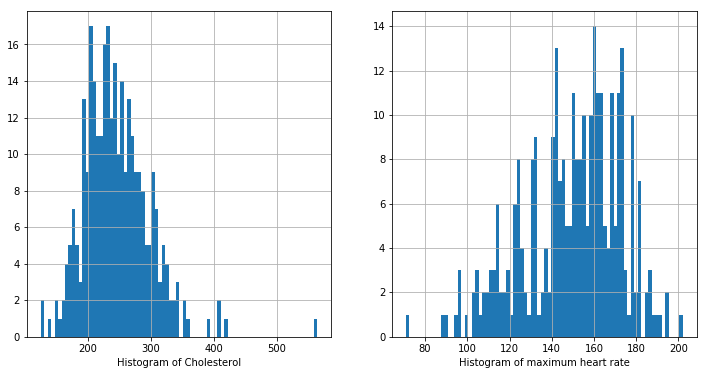

In [94]:
#Dribution analysis
fig = plt.figure(figsize=(12, 6))

chol = fig.add_subplot(121)
maxhr = fig.add_subplot(122)

chol.hist(ws.cholesterol, bins=80)
chol.set_xlabel('Cholesterol/g')
chol.set_xlabel("Histogram of Cholesterol")
chol.grid(True)
maxhr.hist(ws.maxhr_rate, bins=80)
maxhr.set_xlabel('Maximum heart rate')
maxhr.set_xlabel("Histogram of maximum heart rate")
maxhr.grid(True)

plt.show()

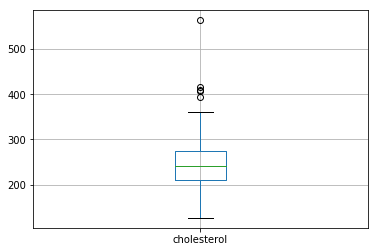

In [95]:
ws.boxplot(column='cholesterol')

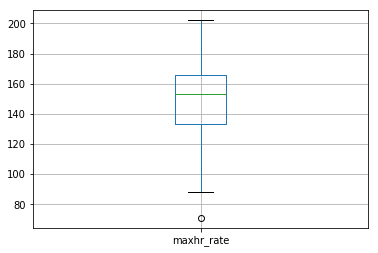

In [96]:
ws.boxplot(column='maxhr_rate')

In [97]:
temp1 = df['eiang'].value_counts(ascending=True)
temp2 = df.pivot_table(values='diagnosis',index=['eiang'],aggfunc=lambda x: x.map({1:1,0:0}).mean())
print ('Frequency Table for Angina:') 
print (temp1)

print ('\nProbility of being diagnosed healthy for each angina class:')
print (temp2)

Frequency Table for Angina:
1     99
0    204
Name: eiang, dtype: int64

Probility of being diagnosed healthy for each angina class:
       diagnosis
eiang           
0       0.696078
1       0.232323


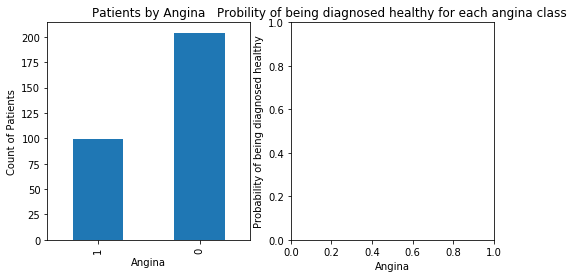

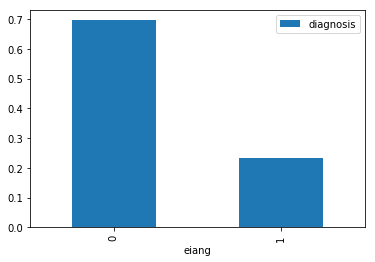

In [98]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Angina')
ax1.set_ylabel('Count of Patients')
ax1.set_title("Patients by Angina")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Angina')
ax2.set_ylabel('Probability of being diagnosed healthy')
ax2.set_title("Probility of being diagnosed healthy for each angina class")
temp2.plot(kind = 'bar')

In [99]:
#regression analysis
import statsmodels.formula.api as smf #import statsmodels to get the least squares regression estimator function

In [100]:
#Reg = ols(‘Dependent variable ~ independent variable(s), dataframe).fit()
lm = smf.ols(formula='blood_pressure ~ cholesterol', data=ws).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.637
Date:                Tue, 20 Mar 2018   Prob (F-statistic):             0.0321
Time:                        01:25:33   Log-Likelihood:                -1295.0
No. Observations:                 303   AIC:                             2594.
Df Residuals:                     301   BIC:                             2601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     121.3598      4.871     24.917      0.000     111.775     130.944
cholesterol     0.0417      0.019      2.153      0.032       0.004       0.080
==============================================================================
Omnibus:                       25.774   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.771
Skew:                           0.680   Prob(JB):                     2.08e-07
Kurtosis:                       3.765   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#Hypothesis Testing and p-values
#Hypothesis test 
#null hypothesis: There is no relationship between cholesterol and blood pressure (and thus $\beta_1$ equals zero)
#alternative hypothesis: There is a relationship between cholesterol and blood pressure (and thus $\beta_1$ is not equal to zero)
# print the p-values for the model coefficients
lm.pvalues
#pvalue below 10 to the power of -2 = 0.02 less than 0.05(alpha)

Intercept      3.883000e-75
cholesterol    3.208205e-02
dtype: float64

In [102]:
#If the 95% confidence interval does not include zero, the p-value will be less than 0.05(using 0.05 as the cutoff is just a convention)
#In this case, the p-value for cholesterol is far less than 0.05, and so we believe that there is a relationship between cholesterol and blood pressure.

In [103]:
#Lets say your cholesterol level is 210 . Then your blood pressure is predicted as follows
y =  121.3598 + 0.0417 * 210
y

130.1168

In [104]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'cholesterol': [210]})
X_new.head()

,cholesterol
0,210


In [105]:
# use the model to make predictions on a new value
lm.predict(X_new)


0    130.112319
dtype: float64

In [106]:
#Multivariate  Linear Regression
lm = smf.ols(formula='blood_pressure ~ cholesterol + maxhr_rate', data=ws).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.631
Date:                Tue, 20 Mar 2018   Prob (F-statistic):             0.0736
Time:                        01:26:12   Log-Likelihood:                -1294.7
No. Observations:                 303   AIC:                             2595.
Df Residuals:                     300   BIC:                             2607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     126.6084      8.209     15.423      0.000     110.454     142.763
cholesterol     0.0415      0.019      2.144      0.033       0.003       0.080
maxhr_rate     -0.0348      0.044     -0.795      0.428      -0.121       0.051
==============================================================================
Omnibus:                       25.566   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.568
Skew:                           0.674   Prob(JB):                     2.30e-07
Kurtosis:                       3.776   Cond. No.                     2.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#Hypothesis Testing and p-values
#Hypothesis test 
#null hypothesis: There is no relationship between cholesterol and blood pressure (and thus $\beta_1$ equals zero)
#alternative hypothesis: There is a relationship between cholesterol and blood pressure (and thus $\beta_1$ is not equal to zero)
# print the p-values for the model coefficients
lm.pvalues
#pvalue below 10 to the power of -2 and -1 is less than 0.05(alpha)

Intercept      6.384174e-40
cholesterol    3.283097e-02
maxhr_rate     4.275093e-01
dtype: float64

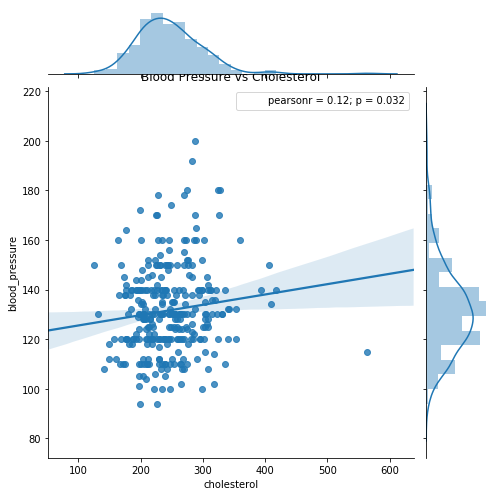

In [108]:
#Visualizing the regression results
#Seaborn (sns), which has an incredibly simple and intuitive function for graphing regression lines with scatterplots
sns.jointplot(x="cholesterol", y="blood_pressure", data=ws, kind = 'reg',fit_reg= True, size = 7)
plt.title('Blood Pressure vs Cholesterol')
plt.show()

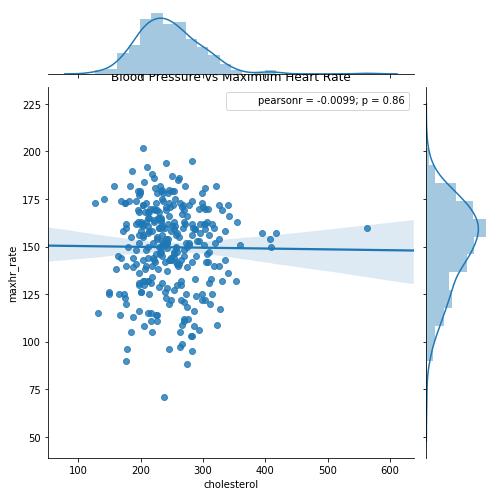

In [109]:
#Visualizing the regression results
sns.jointplot(x="cholesterol", y="maxhr_rate", data=ws, kind = 'reg',fit_reg= True, size = 7)
plt.title('Blood Pressure vs Maximum Heart Rate')
plt.show()

In [110]:
#We want to create natural groupings for a set of data objects(age and maximum heart rate)
#K Means Clustering Algorithmn
ws = df[['cholesterol','age',]]
ws.head()

,cholesterol,age
2,206.0,60
3,266.0,49
4,211.0,64
5,254.0,63
6,203.0,53


Text(0.5,0,'Cholesterol (mg)')

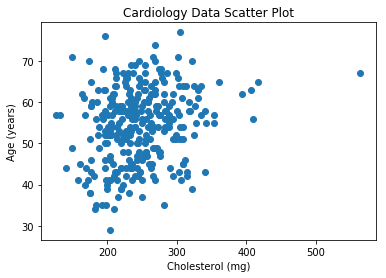

In [111]:
ws.columns = ['cholesterol', 'age']
#show scatter plot of 303 observations for patients in terms of cholesterol
plt.scatter(ws.cholesterol, ws.age)
plt.title('Cardiology Data Scatter Plot')
plt.ylabel('Age (years)')
plt.xlabel('Cholesterol (mg)')

In [112]:
import sklearn
from sklearn import cluster

In [113]:
cardio = np.array(ws)

k=3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(cardio)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


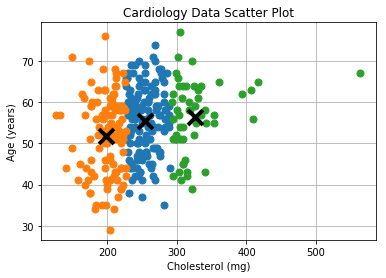

In [114]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = cardio[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.grid(True)
plt.title('Cardiology Data Scatter Plot')
plt.ylabel('Age (years)')
plt.xlabel('Cholesterol (mg)')
plt.show()

In [115]:
#Decision Tree
data_path = "C:/Users/carllel colquhoun/Desktop/PYTHON FILES/LabWeek5/CardiologyCategorical.xls"
data = pd.read_excel(data_path)
# Removing First two (2) rows, not part of data set
data = data.drop([0,1],axis=0)
# extracting selected features
data2 = data[['age','sex','blood pressure','angina','class']]
data2.head()

,age,sex,blood pressure,angina,class
2,60,Male,130,True,Sick
3,49,Male,130,False,Healthy
4,64,Male,110,True,Healthy
5,63,Male,130,False,Sick
6,53,Male,140,True,Sick


In [116]:
# decision tree from sklearn only accepts float/integer values for variables
# We must therefore transform the data before applying the algorithm
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'age' and column != 'blood pressure':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

label_encoders = create_label_encoder_dict(data2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(angina) = [False True]
       Encoded Values
False               0
True                1
Encoder(class) = ['Healthy' 'Sick']
         Encoded Values
Healthy               0
Sick                  1


In [117]:
# Apply each encoder to the data set to obtain transformed values
data3 = data2.copy() # create copy of initial data set
for column in data3.columns:
    if column in label_encoders:
        data3[column] = label_encoders[column].transform(data3[column])

print("Transformed data set")
data3.head()

Transformed data set


,age,sex,blood pressure,angina,class
2,60,1,130,1,1
3,49,1,130,0,0
4,64,1,110,1,0
5,63,1,130,0,1
6,53,1,140,1,1


In [118]:
#divides data into feature set & target set
#feature set
X = data3[['age','sex','blood pressure','angina']]
#target set
Y = data3['class']

In [119]:
#split our data into training and test set using sklearn’s train_test_split() method.
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [120]:
#Decision Tree Training
#Decision Tree Classifier with criterion information gain
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [121]:
print(pd.DataFrame([ "%.2f%%" % perc for perc in (clf.feature_importances_ * 100) ], index = X_data.columns, columns = ['Feature Significance in Decision Tree']))

               Feature Significance in Decision Tree
age                                           29.69%
sex                                           23.64%
blood pressure                                 4.97%
angina                                        41.71%


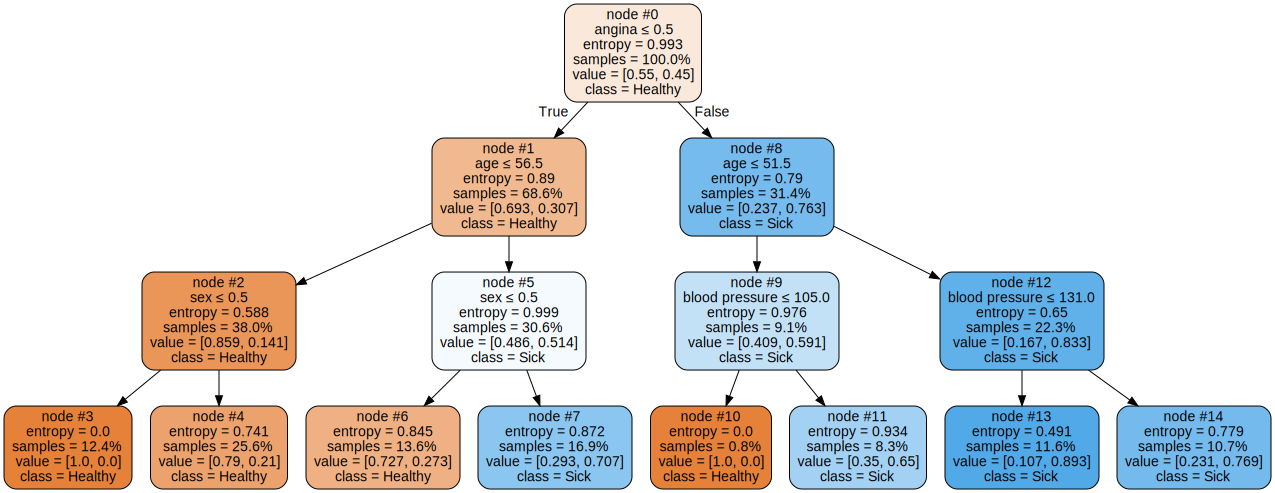

In [122]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz

dot_data = tree.export_graphviz(clf,out_file=None, 
                                feature_names=X_data.columns, 
                         class_names=label_encoders[Y_data.name].classes_,  
                         filled=True, rounded=True,  proportion=True,
                                node_ids=True, #impurity=False,
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [123]:
#After we have fitted the model, we are ready to predict classes for our test set. We can use predict() method
#So we have two test set for patient A:age=50,sex=male(1),blood pressure=135 & angina=false(0)
#Target =class(sick:1,healthy:0)
clf.predict([[50,1,135,0]])

array([0], dtype=int64)

In [124]:
clf.predict([[65,0,180,1]])

array([1], dtype=int64)

In [125]:
#predict target variable for the whole test dataset.(sick:1,healthy:0)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [126]:
#The function accuracy_score() will be used to print accuracy of Decision Tree algorithm
#By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points.
#Accuracy for Decision Tree classifier with criterion as information gain
print ("Accuracy for Decision Tree classifier with criterion as IG is ", accuracy_score(y_test,y_pred)*100)

Accuracy for Decision Tree classifier with criterion as IG is  70.4918032787
